In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

def plot_polygon(polygon, newfigure=True, args={}, size=(15, 9)):
    x = np.array([v[0] for v in polygon])  # coordenada x
    y = np.array([v[1] for v in polygon])  # coordenada y

    if newfigure:
        plt.figure(figsize=size)
    
    plt.plot(x, y, **args)  # passando os argumentos para a funcao plot


# A forma que eu consegui achar a área desse poligono foi por essa
# formula de Shoelace (ou Formula da area de Gauss) que encontrei quando tava pesquisando sobre.

def shoelace_formula(vertices):
    soma1 = 0
    soma2 = 0

    for i in range(len(vertices) - 1):
        soma1 += vertices[i][0] * vertices[i + 1][1]
        soma2 += vertices[i][1] * vertices[i + 1][0]
    
    soma1 += vertices[-1][0] * vertices[0][1]
    soma2 += vertices[-1][1] * vertices[0][0]

    area = abs(soma1 - soma2)
    area = area / 2

    return area


# Questão 3: $(1,5 \; pontos)$

Qual a área de um polígono com vértices em $\{(-2,-2), (-1,-1), (1,-1), (2,-2), (0,5)\}$? Fazendo $s_x = 2$, qual deve ser o valor de $s_y$ para termos um polígono com 6 vezes a área original? Mostre que o polígono após escalonado apresenta 6 vezes a área original.

Apresente uma simulação com esse polígono e o escalonamento.

Área do poligono original: 11.00
Área do poligono aumentado 6x: 66.00


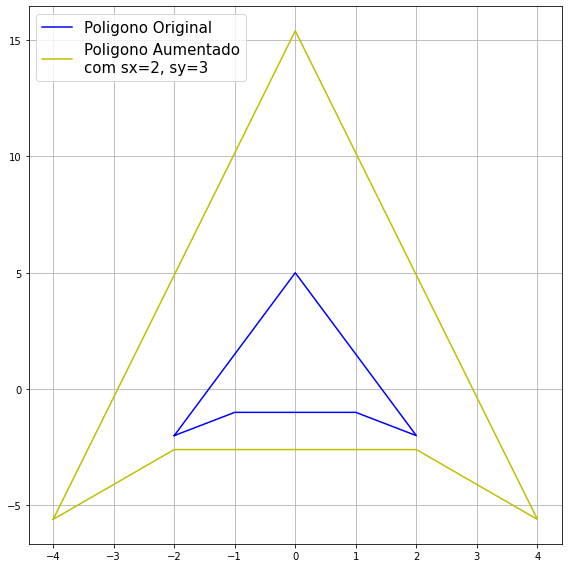

In [ ]:

# RESPOSTA
# A área original do polígono é 11.
# Para ter 6 vezes a area do poligono original, Sy tem que ser igual a 3.
# A area do poligono escalonado é 66.

poligono = np.array([
        [-2, -2,  1],
        [-1, -1,  1],
        [1,  -1,  1],
        [2,  -2,  1],
        [0,   5,  1],
        [-2, -2,  1]
        
])

plot_polygon(poligono, size=(8, 8),args={'label': 'Poligono Original', 'c': 'b'})
area_poligono_original = shoelace_formula(poligono[:-1])

centro_poligono = np.mean(poligono[:-1], axis=0)

xc = centro_poligono[0]
yc = centro_poligono[1]

ida_ao_centro = np.array([
            [1,    0,  0],
            [0,    1,  0],
            [-xc, -yc, 1]
])

volta_do_centro = np.array([
            [1, 0,   0],
            [0, 1,   0],
            [xc, yc, 1]
])

escalonamento = np.array([
            [2, 0, 0], 
            [0, 3, 0],
            [0, 0, 1]
])

poligono_aumentado = np.matmul(poligono, ida_ao_centro)
poligono_aumentado = np.matmul(poligono_aumentado, escalonamento)
poligono_aumentado = np.matmul(poligono_aumentado, volta_do_centro)

plot_polygon(poligono_aumentado, newfigure=False, args={'label': 'Poligono Aumentado\ncom sx=2, sy=3', 'c': 'y'})

print(f'Área do poligono original: {area_poligono_original :.2f}')
print(f'Área do poligono aumentado 6x: {shoelace_formula(poligono_aumentado[:-1]) :.2f}')

plt.tight_layout()
plt.legend(prop={'size': 15}, loc=2)
plt.grid();
